# Tugas 2 - Regresi Linier [Big Data Analysist]
# Nama : .....................
# NIM : .....................

In [1]:
# Membaca csv file

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('titanic.csv')
# pd.set_option('display.max_rows', None)
data_look = data['Passenger Fare'].value_counts()
display(data)

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0.0,0.0,24160,211.3375,B5,Southampton,2,Yes
1,First,"Allison, Master. Hudson Trevor",Male,0.9167,1.0,2.0,113781,151.5500,C22 C26,Southampton,11,Yes
2,First,"Allison, Miss. Helen Loraine",Female,2.0000,1.0,2.0,113781,151.5500,C22 C26,Southampton,NaN,No
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1.0,2.0,113781,151.5500,C22 C26,Southampton,NaN,No
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1.0,2.0,113781,151.5500,C22 C26,Southampton,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",Female,14.5000,1.0,0.0,2665,14.4542,NaN,Cherbourg,NaN,No
1305,Third,"Zabour, Miss. Thamine",Female,NaN,1.0,0.0,2665,14.4542,NaN,Cherbourg,NaN,No
1306,Third,"Zakarian, Mr. Mapriededer",Male,26.5000,0.0,0.0,2656,7.2250,NaN,Cherbourg,NaN,No
1307,Third,"Zakarian, Mr. Ortin",Male,27.0000,0.0,0.0,2670,7.2250,NaN,Cherbourg,NaN,No


In [2]:
# Rubah value 'Sex' Menjadi numerik (0,1)
sex_mapping = {"Male": 0, "Female": 1}
data['Sex'] = data['Sex'].map(sex_mapping)

# Rubah value 'Survived' Menjadi numerik (0,1)
survived_mapping = {"No": 0, "Yes": 1}
data['Survived'] = data['Survived'].map(survived_mapping)

# Menampilkan table yang sudah dirubah numerik
display(data)

# Menggabungkan 4 parameter kolom untuk ditemukan koreasinya menggunakan fungsi corr
correlation_matrix = data[['Sex', 'Age', 'Passenger Fare', 'Survived']].corr()

# Menampilkan variabel matriks korelasi
correlation_matrix


,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
0,First,"Allen, Miss. Elisabeth Walton",1,29.0000,0.0,0.0,24160,211.3375,B5,Southampton,2,1
1,First,"Allison, Master. Hudson Trevor",0,0.9167,1.0,2.0,113781,151.5500,C22 C26,Southampton,11,1
2,First,"Allison, Miss. Helen Loraine",1,2.0000,1.0,2.0,113781,151.5500,C22 C26,Southampton,NaN,0
3,First,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1.0,2.0,113781,151.5500,C22 C26,Southampton,NaN,0
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1.0,2.0,113781,151.5500,C22 C26,Southampton,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",1,14.5000,1.0,0.0,2665,14.4542,NaN,Cherbourg,NaN,0
1305,Third,"Zabour, Miss. Thamine",1,NaN,1.0,0.0,2665,14.4542,NaN,Cherbourg,NaN,0
1306,Third,"Zakarian, Mr. Mapriededer",0,26.5000,0.0,0.0,2656,7.2250,NaN,Cherbourg,NaN,0
1307,Third,"Zakarian, Mr. Ortin",0,27.0000,0.0,0.0,2670,7.2250,NaN,Cherbourg,NaN,0


,Sex,Age,Passenger Fare,Survived
Sex,1.000000,-0.063646,0.185523,0.528693
Age,-0.063646,1.000000,0.178739,-0.055513
Passenger Fare,0.185523,0.178739,1.000000,0.244265
Survived,0.528693,-0.055513,0.244265,1.000000


# 1) Gambarkan plot menggunakan line chart korelasi "Sex", "Age", "Passenger Fare", dengan "Survived".

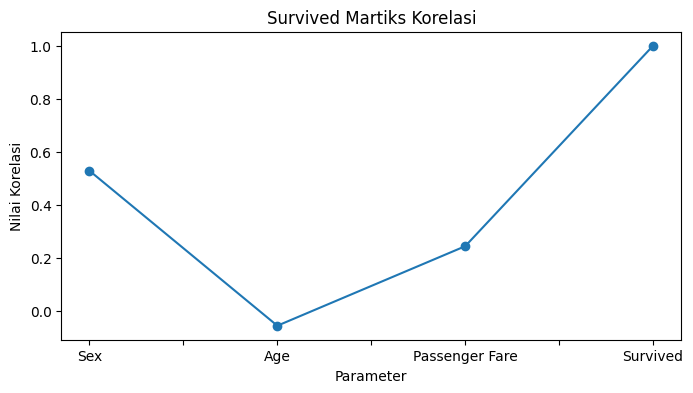

In [3]:
from matplotlib import pyplot as plt
correlation_matrix['Survived'].plot(kind='line', figsize=(8, 4), title='Survived Martiks Korelasi', marker='o')
plt.xlabel('Parameter')
plt.ylabel('Nilai Korelasi')
plt.gca().spines[['top', 'right']].set_visible(True)

# 2) Buat model inferensi menggunakan regresi linear.

In [4]:
# Menampilkan kolom yang memiliki nilai yang masih null (NaN)
display("DATA SEBELUM DIBERSIHKAN", data.isnull().sum())

# Mengisi nilai yang hilang (NaN) pada kolom 'Age' dengan median
data['Age'] = data['Age'].fillna(data['Age'].mean())

# Mengisi nilai yang hilang (NaN) pada kolom 'Passenger Fare' dengan median
data['Passenger Fare'] = data['Passenger Fare'].fillna(data['Passenger Fare'].median())

# Menampilkan data setelah diisi
display("DATA SESUDAH DIBERSIHKAN", data.isnull().sum())

'DATA SEBELUM DIBERSIHKAN'

Passenger Class                          0
Name                                     0
Sex                                      0
Age                                    263
No of Siblings or Spouses on Board       0
No of Parents or Children on Board       0
Ticket Number                            0
Passenger Fare                           1
Cabin                                 1014
Port of Embarkation                      2
Life Boat                              823
Survived                                 0
dtype: int64

'DATA SESUDAH DIBERSIHKAN'

Passenger Class                          0
Name                                     0
Sex                                      0
Age                                      0
No of Siblings or Spouses on Board       0
No of Parents or Children on Board       0
Ticket Number                            0
Passenger Fare                           0
Cabin                                 1014
Port of Embarkation                      2
Life Boat                              823
Survived                                 0
dtype: int64

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.simplefilter(action='ignore', category=UserWarning)

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Pilih fitur dan target
x = data[['Sex', 'Age', 'Passenger Fare']]
x_scaled = scaler.fit_transform(x)
y = data['Survived']

# Bagi data menjadi training dan testing set
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Inisialisasi dan latih model regresi linear
model = LinearRegression()
model.fit(x_train, y_train)

# Lakukan prediksi pada data testing
y_pred = model.predict(x_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Contoh inferensi dengan data baru
new_data = pd.DataFrame({'Sex': [0,1], 'Age': [25, 30], 'Passenger Fare': [70, 100]})
predictions = model.predict(new_data)
print(f"\nPrediksi untuk data baru:\n{predictions}")

Mean Squared Error: 0.155235761183577
R-squared: 0.34222200057497176

Prediksi untuk data baru:
[54.63993535 79.4632922 ]


# 3) Perlihatkan confusion matrixnya untuk menggambarkan Akurasi, Recall, F1-Score.

Akurasi: 0.8053435114503816
Recall: 0.73
F1-Score: 0.7411167512690355


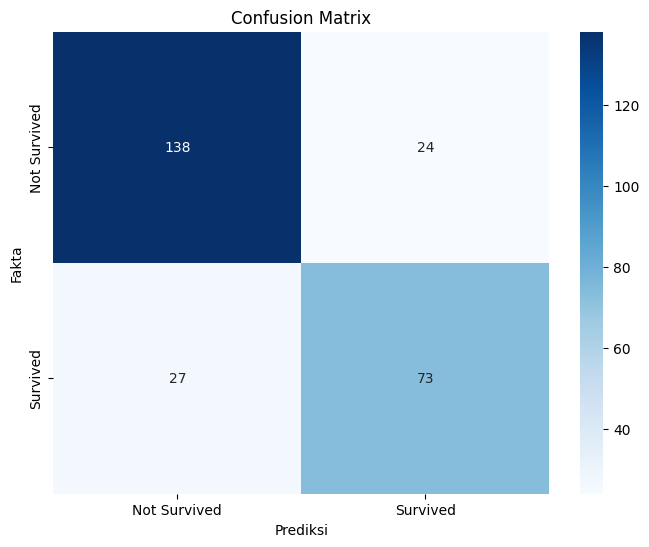

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
import seaborn as sns

# Hitung the confusion matrix
cm = confusion_matrix(y_test, np.round(y_pred))

# Inisialisasi & kalkulasi Akurasi, Recall dan F1-Score
accuracy = accuracy_score(y_test, np.round(y_pred))
recall = recall_score(y_test, np.round(y_pred))
f1 = f1_score(y_test, np.round(y_pred))

print(f"Akurasi: {accuracy}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Membuat plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Fakta')
plt.show()